In [287]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sys,glob
import pyrotd
# ---------------------------------------------------------------------------------------
curdir = os.getcwd()
# Station information
infodir = curdir+"/info"
datadir = curdir+"/data"
#
infofile = infodir+"/"+"20200409acc_net.cwb.txt"
# Vs30 information
vs30i = pd.read_csv('info//Stainf.txt',
                   header=0,
                   delim_whitespace=True,
                   names=['name','vs30','z1']
                  )
vs30i = vs30i.drop_duplicates(subset=['name','vs30','z1'], keep='last');
vs30i.reset_index(drop=True, inplace=True);
# ---------------------------------------------------------------------------------------
# Function converts the seisan coordinates to decimate geographical coordinates
def coor_seisan_to_dec(lat1,lat2,latc,long1,long2,longc):
    '''
    Convert the coordinate from degree-minutes to decimate degree.
    + lat1: lattitude in degree - format I2
    + lat2: lattitude in minutes - format F5.2
    + latc: lattitude coordinate character "N" or "S" - format A1
    + long1: longitude in degree - format I3
    + long2: longitude in minutes - format F5.2
    + longc: longitude coordinate character "E" or "W" - format A1
    - How to use:
    lat, long = coor_seisan_to_dec(lat1,lat2,latc,long1,long2,longc)
    '''
    if (lat1 > 90):
        print('lattitude over range, switch to in range')
        lat1=90-lat1
    lat = lat1 + (lat2/60)
    if(latc == "S"):
        lat = -1 * lat
    long = long1 + (long2/60)
    if(longc == "W"):
        long = -1 * long
    lat = round(lat,4);
    long = round(long,4);
    return lat, long    
# Function to read the starttime and stoptime stamp
def time_stamp(x, y):
    '''
    Convert the timestamp format YYMMDD to YYYY,MM,DD respectively
    Time range from 1980 to 2020
    input:  + x: date format YYDDMM character A6
            + y: time format HHMMSS character A6
    output: + YYYY: - format I4.4
            + MM: - format I2.2
            + DD: - format I2.2
            + HH: - format I2.2
            + MI: - format I2.2
            + SS: - format I2.2
    '''
    YY=x[0:2]; # year time stamp
    DD=x[2:4]; # moth time stamp
    MM=x[4:6]; # day time stamp
    #
    HH=y[0:2]; # hour time stamp
    MI=y[2:4]; # minutes time stamp
    SS=y[4:6]; # second time stamp
#
    DD=int(DD);
    MM=int(MM);
    YYYY=int(YY);
    if (YYYY > 50 & YYYY <=99):
#         print('twenty century')
        YYYY = 1999+YYYY;
    else:
        YYYY = 2000+YYYY;
#         
    HH=int(HH);
    MI=int(MI);
#     SS=int(SS);
#     
    return YYYY, MM, DD, HH, MI, SS
# ---------------------------------------------------------------------------------------
# reading the info file
with open(infofile,'r',encoding="UTF-8") as f:
    lines = f.readlines()
    station = []; lattitude = []; longitude = []; elevation = []; 
    Itype = []; startdate = []; starttime = []; Vs30d = [];
for i, line in enumerate (lines):
    line = lines[i]
#     read the station information
    stanm = line[0:6].strip();
    lat1 = line[7:9].strip();  lat1 = float(lat1);
    lat2 = line[9:13].strip(); lat2 = float(lat2);
    latc = line[14:15].strip();
#     
    long1 = line[15:18].strip(); long1 = float(long1);
    long2 = line[18:23].strip(); long2 = float(long2);
    longc = line[23:24].strip();
#   
    depth = line[24:29].strip(); # sensor depth from ground surface
    elv = line[31:34].strip(); # Elevation
    flc = line[36:39].strip(); # Full scale value
    itype = line[43:47].strip(); # Instrumention index
    sdate = line[64:69].strip(); # begin the operation time
    stime = line[71:77].strip(); # end of operation time
# 
    lat,long = coor_seisan_to_dec(lat1,lat2,latc,long1,long2,longc)
#     Y,M,D,H,MI,S = time_stamp(sdate,stime)
#  Creat the data table
    station.append(stanm.strip())
    lattitude.append(lat)
    longitude.append(long)
    elevation.append(elv.strip())
    startdate.append(sdate.strip())
    starttime.append(stime.strip())
    Itype.append(itype.strip())
#    
datao ={
       'station_name':station,'lattitude':lattitude,
       'longitude':longitude,'elevation':elevation,
       'Instrumentation':Itype,
#        'start_date':startdate,'start_time':starttime
      }
df = pd.DataFrame(datao)
#
df1 = df.drop_duplicates(subset=['station_name','Instrumentation'], keep='last');
df1.reset_index(drop=True, inplace=True);
#
df1.to_csv('cwb_station.txt',sep='\t',header= True,index=False,line_terminator='\n')
f.close()
print("Station informations loaded!!!")

Station informations loaded!!!


In [326]:
import os
dirs = os.listdir('data')
dirs[0]

'20190807212803'

data//20190807212803//20190807212803.dat 20190807212803.txt
process the data file: 0 data//20190807212803//01821900.CVA.txt
process the data file: 1 data//20190807212803//50621900.MNS.txt
process the data file: 2 data//20190807212803//C9821900.SMT.txt
process the data file: 3 data//20190807212803//D4021901.SMT.txt
process the data file: 4 data//20190807212803//E9121900.SMT.txt
process the data file: 5 data//20190807212803//63414300.EVT.txt
process the data file: 6 data//20190807212803//06421900.CVA.txt
process the data file: 7 data//20190807212803//D0621900.SMT.txt
process the data file: 8 data//20190807212803//05921900.CVA.txt
process the data file: 9 data//20190807212803//08521900.CVA.txt
process the data file: 10 data//20190807212803//E9821900.SMT.txt
process the data file: 11 data//20190807212803//T061001.356.txt
process the data file: 12 data//20190807212803//02021900.CVA.txt
process the data file: 13 data//20190807212803//C8021900.SMT.txt
process the data file: 14 data//201908072

process the data file: 125 data//20190807212803//O6221900.SMT.txt
process the data file: 126 data//20190807212803//10521900.MNS.txt
process the data file: 127 data//20190807212803//13421900.CVA.txt
process the data file: 128 data//20190807212803//01521900.CVA.txt
process the data file: 129 data//20190807212803//41821900.MNS.txt
process the data file: 130 data//20190807212803//T017001.356.txt
process the data file: 131 data//20190807212803//39321900.MNS.txt
process the data file: 132 data//20190807212803//33921900.MNS.txt
process the data file: 133 data//20190807212803//24921900.MNS.txt
process the data file: 134 data//20190807212803//T567001.219.txt
process the data file: 135 data//20190807212803//41121900.MNS.txt
process the data file: 136 data//20190807212803//22321900.MNS.txt
process the data file: 137 data//20190807212803//40221900.MNS.txt
process the data file: 138 data//20190807212803//F3821900.SMT.txt
process the data file: 139 data//20190807212803//42321900.MNS.txt
process the 

process the data file: 250 data//20190807212803//O3121900.SMT.txt
process the data file: 251 data//20190807212803//B9121900.SMT.txt
process the data file: 252 data//20190807212803//18621900.MNS.txt
process the data file: 253 data//20190807212803//37521900.MNS.txt
process the data file: 254 data//20190807212803//F1621906.SMT.txt
process the data file: 255 data//20190807212803//F8135600.EVT.txt
process the data file: 256 data//20190807212803//24421900.MNS.txt
process the data file: 257 data//20190807212803//30621900.MNS.txt
process the data file: 258 data//20190807212803//D5921900.SMT.txt
process the data file: 259 data//20190807212803//T493001.219.txt
process the data file: 260 data//20190807212803//19321900.MNS.txt
process the data file: 261 data//20190807212803//10721900.MNS.txt
process the data file: 262 data//20190807212803//T091001.356.txt
process the data file: 263 data//20190807212803//C9921900.SMT.txt
process the data file: 264 data//20190807212803//24821900.MNS.txt
process the 

process the data file: 375 data//20190807212803//N8021900.SMT.txt
process the data file: 376 data//20190807212803//16521900.MNS.txt
process the data file: 377 data//20190807212803//41621900.MNS.txt
process the data file: 378 data//20190807212803//17721900.MNS.txt
process the data file: 379 data//20190807212803//N0421900.SMT.txt
process the data file: 380 data//20190807212803//L4621900.SMT.txt
process the data file: 381 data//20190807212803//57821900.MNS.txt
process the data file: 382 data//20190807212803//51121900.MNS.txt
process the data file: 383 data//20190807212803//48921900.MNS.txt
process the data file: 384 data//20190807212803//49721900.MNS.txt
process the data file: 385 data//20190807212803//L7721900.SMT.txt
process the data file: 386 data//20190807212803//J0721900.SMT.txt
process the data file: 387 data//20190807212803//L5421900.SMT.txt
process the data file: 388 data//20190807212803//F0721900.SMT.txt
process the data file: 389 data//20190807212803//L5821900.SMT.txt
process th

process the data file: 500 data//20190807212803//M2521900.SMT.txt
process the data file: 501 data//20190807212803//15535600.CVA.txt
process the data file: 502 data//20190807212803//31221900.MNS.txt
process the data file: 503 data//20190807212803//12921900.MNS.txt
process the data file: 504 data//20190807212803//34621900.MNS.txt
process the data file: 505 data//20190807212803//50321900.MNS.txt
process the data file: 506 data//20190807212803//49921900.MNS.txt
process the data file: 507 data//20190807212803//D9321900.SMT.txt
process the data file: 508 data//20190807212803//38921900.MNS.txt
process the data file: 509 data//20190807212803//N5621900.SMT.txt
process the data file: 510 data//20190807212803//37421900.MNS.txt
process the data file: 511 data//20190807212803//49421900.MNS.txt
process the data file: 512 data//20190807212803//48821900.MNS.txt
process the data file: 513 data//20190807212803//50721900.MNS.txt
process the data file: 514 data//20190807212803//56821900.MNS.txt
process th

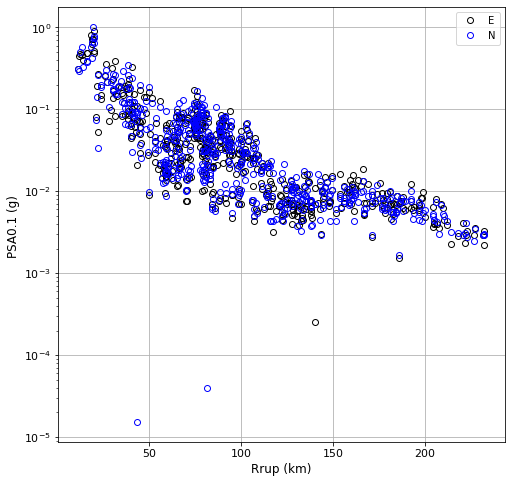

data//20180206155041//20180206155041.dat 20180206155041.txt
process the data file: 0 data//20180206155041//14003708.CVA.txt
process the data file: 1 data//20180206155041//17603727.MNS.txt
process the data file: 2 data//20180206155041//39003719.MNS.txt
process the data file: 3 data//20180206155041//38003722.MNS.txt
process the data file: 4 data//20180206155041//D2003710.SMT.txt
process the data file: 5 data//20180206155041//E8803703.SMT.txt
process the data file: 6 data//20180206155041//T497006.037.txt
process the data file: 7 data//20180206155041//39603708.MNS.txt
process the data file: 8 data//20180206155041//33503703.MNS.txt
process the data file: 9 data//20180206155041//13703702.CVA.txt
process the data file: 10 data//20180206155041//13203702.CVA.txt
process the data file: 11 data//20180206155041//T575006.037.txt
process the data file: 12 data//20180206155041//12503702.CVA.txt
process the data file: 13 data//20180206155041//02503702.CVA.txt
process the data file: 14 data//2018020615

process the data file: 126 data//20180206155041//20203700.MNS.txt
process the data file: 127 data//20180206155041//08217400.CVA.txt
process the data file: 128 data//20180206155041//T022001.037.txt
process the data file: 129 data//20180206155041//E9503700.SMT.txt
process the data file: 130 data//20180206155041//10103700.CVA.txt
process the data file: 131 data//20180206155041//B8803700.SMT.txt
process the data file: 132 data//20180206155041//M9703700.SMT.txt
process the data file: 133 data//20180206155041//01903700.CVA.txt
process the data file: 134 data//20180206155041//41803700.MNS.txt
process the data file: 135 data//20180206155041//35803700.MNS.txt
process the data file: 136 data//20180206155041//T509002.037.txt
process the data file: 137 data//20180206155041//B9603700.SMT.txt
process the data file: 138 data//20180206155041//35503700.MNS.txt
process the data file: 139 data//20180206155041//11603700.MNS.txt
process the data file: 140 data//20180206155041//43403700.MNS.txt
process the 

process the data file: 251 data//20180206155041//16503700.MNS.txt
process the data file: 252 data//20180206155041//B6803700.SMT.txt
process the data file: 253 data//20180206155041//18917400.CVA.txt
process the data file: 254 data//20180206155041//N0403700.SMT.txt
process the data file: 255 data//20180206155041//F8003700.EVT.txt
process the data file: 256 data//20180206155041//18303700.MNS.txt
process the data file: 257 data//20180206155041//D6503700.SMT.txt
process the data file: 258 data//20180206155041//N5103700.SMT.txt
process the data file: 259 data//20180206155041//L7203700.SMT.txt
process the data file: 260 data//20180206155041//20703700.MNS.txt
process the data file: 261 data//20180206155041//C8403700.SMT.txt
process the data file: 262 data//20180206155041//05717400.CVA.txt
process the data file: 263 data//20180206155041//00403700.CVA.txt
process the data file: 264 data//20180206155041//42803700.MNS.txt
process the data file: 265 data//20180206155041//N2403700.SMT.txt
process th

process the data file: 376 data//20180206155041//L8803700.SMT.txt
process the data file: 377 data//20180206155041//34903700.MNS.txt
process the data file: 378 data//20180206155041//N1903700.SMT.txt
process the data file: 379 data//20180206155041//31003700.MNS.txt
process the data file: 380 data//20180206155041//L4603700.SMT.txt
process the data file: 381 data//20180206155041//13403700.MNS.txt
process the data file: 382 data//20180206155041//10003700.SMT.txt
process the data file: 383 data//20180206155041//23203700.MNS.txt
process the data file: 384 data//20180206155041//37503700.MNS.txt
process the data file: 385 data//20180206155041//98403700.EVT.txt
process the data file: 386 data//20180206155041//15403700.MNS.txt
process the data file: 387 data//20180206155041//C4603700.SMT.txt
process the data file: 388 data//20180206155041//15103700.MNS.txt
process the data file: 389 data//20180206155041//01103700.CVA.txt
process the data file: 390 data//20180206155041//F8103700.EVT.txt
process th

process the data file: 501 data//20180206155041//N5403700.SMT.txt
process the data file: 502 data//20180206155041//30803700.MNS.txt
process the data file: 503 data//20180206155041//34103700.MNS.txt
process the data file: 504 data//20180206155041//D9003700.SMT.txt
process the data file: 505 data//20180206155041//17717400.CVA.txt
process the data file: 506 data//20180206155041//N6303700.SMT.txt
process the data file: 507 data//20180206155041//D6603700.SMT.txt
process the data file: 508 data//20180206155041//15503700.MNS.txt
process the data file: 509 data//20180206155041//D3203700.SMT.txt
process the data file: 510 data//20180206155041//17303700.MNS.txt
process the data file: 511 data//20180206155041//20803700.MNS.txt
process the data file: 512 data//20180206155041//C3403700.SMT.txt
process the data file: 513 data//20180206155041//19903700.MNS.txt
process the data file: 514 data//20180206155041//L5703700.SMT.txt
process the data file: 515 data//20180206155041//30703700.MNS.txt
process th

process the data file: 626 data//20180206155041//19103700.MNS.txt
process the data file: 627 data//20180206155041//N6103700.SMT.txt
process the data file: 628 data//20180206155041//F4303700.SMT.txt
process the data file: 629 data//20180206155041//E0203700.SMT.txt
process the data file: 630 data//20180206155041//16703700.MNS.txt
process the data file: 631 data//20180206155041//15303700.MNS.txt
process the data file: 632 data//20180206155041//O6103700.SMT.txt
process the data file: 633 data//20180206155041//12103700.MNS.txt
process the data file: 634 data//20180206155041//20103704.MNS.txt
process the data file: 635 data//20180206155041//19203704.CVA.txt
process the data file: 636 data//20180206155041//F0803708.SMT.txt
process the data file: 637 data//20180206155041//F3403700.SMT.txt
process the data file: 638 data//20180206155041//D3303700.SMT.txt
process the data file: 639 data//20180206155041//98103700.EVT.txt
process the data file: 640 data//20180206155041//C7803700.SMT.txt
process th

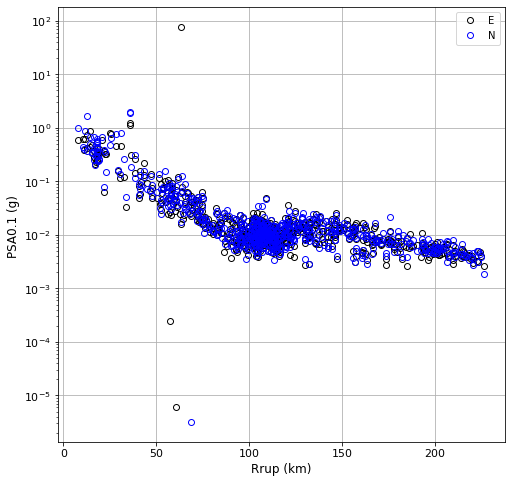

data//20190418050107//20190418050107.dat 20190418050107.txt
process the data file: 0 data//20190418050107//39610800.MNS.txt
process the data file: 1 data//20190418050107//T575001.108.txt
process the data file: 2 data//20190418050107//12110800.CVA.txt
process the data file: 3 data//20190418050107//E8810800.SMT.txt
process the data file: 4 data//20190418050107//33510800.MNS.txt
process the data file: 5 data//20190418050107//N7310800.SMT.txt
process the data file: 6 data//20190418050107//13110800.CVA.txt
process the data file: 7 data//20190418050107//02510800.CVA.txt
process the data file: 8 data//20190418050107//T497001.108.txt
process the data file: 9 data//20190418050107//11810800.CVA.txt
process the data file: 10 data//20190418050107//12210800.CVA.txt
process the data file: 11 data//20190418050107//46710800.MNS.txt
process the data file: 12 data//20190418050107//13510800.CVA.txt
process the data file: 13 data//20190418050107//N7410800.SMT.txt
process the data file: 14 data//2019041805

process the data file: 126 data//20190418050107//09210800.CVA.txt
process the data file: 127 data//20190418050107//O7010800.SMT.txt
process the data file: 128 data//20190418050107//F3710800.SMT.txt
process the data file: 129 data//20190418050107//O1410800.SMT.txt
process the data file: 130 data//20190418050107//53110800.MNS.txt
process the data file: 131 data//20190418050107//43410800.MNS.txt
process the data file: 132 data//20190418050107//L8110800.SMT.txt
process the data file: 133 data//20190418050107//06210800.CVA.txt
process the data file: 134 data//20190418050107//T476001.108.txt
process the data file: 135 data//20190418050107//O2810800.SMT.txt
process the data file: 136 data//20190418050107//N8310800.SMT.txt
process the data file: 137 data//20190418050107//10910800.CVA.txt
process the data file: 138 data//20190418050107//53010800.MNS.txt
process the data file: 139 data//20190418050107//41110800.MNS.txt
process the data file: 140 data//20190418050107//B7910800.SMT.txt
process the

process the data file: 251 data//20190418050107//B8204100.SMT.txt
process the data file: 252 data//20190418050107//C4110800.SMT.txt
process the data file: 253 data//20190418050107//17010800.MNS.txt
process the data file: 254 data//20190418050107//44910800.MNS.txt
process the data file: 255 data//20190418050107//22210800.MNS.txt
process the data file: 256 data//20190418050107//N4910800.SMT.txt
process the data file: 257 data//20190418050107//24110800.MNS.txt
process the data file: 258 data//20190418050107//35510800.MNS.txt
process the data file: 259 data//20190418050107//M3310800.SMT.txt
process the data file: 260 data//20190418050107//D5210800.SMT.txt
process the data file: 261 data//20190418050107//52810800.MNS.txt
process the data file: 262 data//20190418050107//T498001.108.txt
process the data file: 263 data//20190418050107//32910800.MNS.txt
process the data file: 264 data//20190418050107//O2410800.SMT.txt
process the data file: 265 data//20190418050107//33810800.MNS.txt
process the

process the data file: 376 data//20190418050107//34710800.MNS.txt
process the data file: 377 data//20190418050107//O5910800.SMT.txt
process the data file: 378 data//20190418050107//12410800.MNS.txt
process the data file: 379 data//20190418050107//22010800.MNS.txt
process the data file: 380 data//20190418050107//C1010800.SMT.txt
process the data file: 381 data//20190418050107//D2810800.SMT.txt
process the data file: 382 data//20190418050107//02110800.CVA.txt
process the data file: 383 data//20190418050107//19810800.MNS.txt
process the data file: 384 data//20190418050107//C0010800.SMT.txt
process the data file: 385 data//20190418050107//45910800.MNS.txt
process the data file: 386 data//20190418050107//19310800.MNS.txt
process the data file: 387 data//20190418050107//D3310800.SMT.txt
process the data file: 388 data//20190418050107//N2610800.SMT.txt
process the data file: 389 data//20190418050107//56510800.MNS.txt
process the data file: 390 data//20190418050107//O3710800.SMT.txt
process th

process the data file: 501 data//20190418050107//14210800.MNS.txt
process the data file: 502 data//20190418050107//N2010800.SMT.txt
process the data file: 503 data//20190418050107//13910800.MNS.txt
process the data file: 504 data//20190418050107//15010800.MNS.txt
process the data file: 505 data//20190418050107//N2910800.SMT.txt
process the data file: 506 data//20190418050107//F8124500.EVT.txt
process the data file: 507 data//20190418050107//N7810800.SMT.txt
process the data file: 508 data//20190418050107//24410800.MNS.txt
process the data file: 509 data//20190418050107//O3210800.SMT.txt
process the data file: 510 data//20190418050107//B9710800.SMT.txt
process the data file: 511 data//20190418050107//16610800.MNS.txt
process the data file: 512 data//20190418050107//35110800.MNS.txt
process the data file: 513 data//20190418050107//F2210800.SMT.txt
process the data file: 514 data//20190418050107//52010800.MNS.txt
process the data file: 515 data//20190418050107//10610800.MNS.txt
process th

process the data file: 626 data//20190418050107//48310800.MNS.txt
process the data file: 627 data//20190418050107//55810800.MNS.txt
process the data file: 628 data//20190418050107//51510800.MNS.txt
process the data file: 629 data//20190418050107//55010800.MNS.txt
process the data file: 630 data//20190418050107//49310800.MNS.txt
process the data file: 631 data//20190418050107//35210800.MNS.txt
process the data file: 632 data//20190418050107//31310800.MNS.txt
process the data file: 633 data//20190418050107//53310800.MNS.txt
process the data file: 634 data//20190418050107//33210800.MNS.txt
process the data file: 635 data//20190418050107//59310800.MNS.txt
process the data file: 636 data//20190418050107//F0610800.SMT.txt
process the data file: 637 data//20190418050107//37710800.MNS.txt
process the data file: 638 data//20190418050107//33710800.MNS.txt
process the data file: 639 data//20190418050107//51910800.MNS.txt
process the data file: 640 data//20190418050107//58610800.MNS.txt
process th

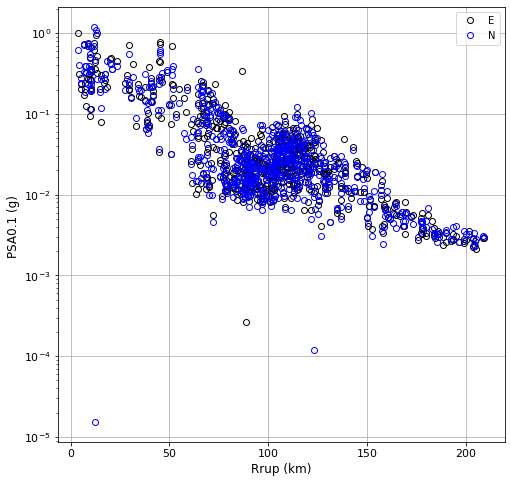

In [385]:
# Read the acceleration report from the file and plot the result to map
dirs = os.listdir('data')
for i in range(len(dirs)):
    dirc = dirs[i];
    rpfile = "data//"+dirc+"//"+dirc+".dat"
    prefile = dirc+".txt"
    
    print(rpfile,prefile)
    adata = pd.read_csv(rpfile,
                        header=0,
                        delim_whitespace=True,
                        names=['Name','Intensity','Dist','PGAZ','PGAN','PGAE','Val1','FileName','aItype','Timestamp','Val2'])
# Tricky replace the value CV75
    adata['aItype'] = adata['aItype'].replace(['CV57'],'CVA');
#
    sdata = pd.read_csv('cwb_station.txt',
                        header=0,
                        delim_whitespace=True,
                        names = ['sName','slat','slong','sele','sItype']
                       )
# Read the earthquake information

    with open(rpfile,'r',encoding="UTF-8") as f:
        lines = f.readlines()
    eqinfor=lines[0];
    eqinfor
    eqlat1=eqinfor[18:20].strip();eqlat2=eqinfor[20:26].strip();
    eqlat=float(eqlat1)+float(eqlat2)/60;
    eqlon1=eqinfor[25:28].strip();eqlon2=eqinfor[28:34].strip();
    eqlon=float(eqlon1)+float(eqlon2)/60;
    eqdepth = eqinfor[34:39].strip(); eqdepth = float(eqdepth);
    eqmag = float(eqinfor[39:43].strip());
# Create the table
    elat = np.ones((len(adata),1))*eqlat;
    elat = pd.DataFrame(elat,columns = ['Hyp.lat']); elat.reset_index(drop=True, inplace=True);
    elon = np.ones((len(adata),1))*eqlon;
    elon = pd.DataFrame(elon,columns = ['Hyp.lon']); elon.reset_index(drop=True, inplace=True);
    edep = np.ones((len(adata),1))*eqdepth;
    edep = pd.DataFrame(edep,columns = ['Hyp.dep']); edep.reset_index(drop=True, inplace=True);
    emag = np.ones((len(adata),1))*eqmag;
    emag = pd.DataFrame(emag,columns = ['ML']); emag.reset_index(drop=True, inplace=True);
#
    eqinfor = pd.concat([elat,elon,edep,emag],axis=1)
# eqlat, eqlon, eqdepth, eqmag

# Tricky replace the value CV75
    sdata['sItype'] = sdata['sItype'].replace(['CV57'],'CVA');
# df = df1.drop_duplicates(subset=['station_name'],keep='last');
    oname = []; olat = []; olong = []; oele = []; oItype = [];
    olater = []; olonger = []; oeleer = [];onameer = []; oItypeer = []; oItypeer1 = [];
    for i,aname in enumerate (adata.Name):
        for j,sname in enumerate (sdata.sName):
            if((adata.Name[i] == sdata.sName[j])&(adata.aItype[i] == sdata.sItype[j])):
#             if(adata.aItype[i] == sdata.sItype[j]):
#             print(i,j,adata.aItype[i],sdata.sItype[j])
                oname.append( sdata.sName[j] );
                oItype.append( adata.aItype[i] );
                olat.append( sdata.slat[j] );
                olong.append( sdata.slong[j] );
                oele.append( sdata.sele[j] );
            else:
#         elif(adata.aItype[i] != sdata.sItype[j]):
#             print(i,j,adata.aItype[i],sdata.sItype[j])
                onameer.append( adata.Name[i]);
                oItypeer.append( adata.aItype[i]);
                oItypeer1.append( sdata.sItype[j]);
#             olater.append( sdata.slat[j] );
#             olonger.append( sdata.slong[j] );
#             oeleer.append( sdata.sele[j] );
    dataer ={
           'station_name':onameer,#'lattitude':olater,
#             'longitude':olonger,'elevation':oeleer,
           'Instrumentation':oItypeer,
           'Instrumentation1':oItypeer1
    }
    dataout = {
#         'station_name':oname,
        'lat':olat,
        'long':olong,
        'ele':oele,
#         'IType':oItype
    }
# Ad vs30 data
    vs30s = []; z1 = []
    for i,ssname in enumerate (adata.Name):
        if (ssname not in vs30i.values[:,0]):
            vs30s.append(0);
            z1.append(0);
        else:
            for j,vsname in enumerate(vs30i.name):
                if(adata.Name[i] == vs30i.name[j]):
                    vs30s.append(vs30i.vs30[j])
                    z1.append(vs30i.z1[j])
    vs30 = pd.DataFrame(vs30s,columns = ['Vs30']); vs30.reset_index(drop=True, inplace=True);
    z1 = pd.DataFrame(z1,columns = ['z1.0']); z1.reset_index(drop=True, inplace=True);
# --------------------------------------------------------------------------------
    dataout = pd.DataFrame(dataout);
# dataer = pd.DataFrame(dataer); dataer = dataer.drop_duplicates(keep='first');
# dataout.to_csv('dataout.txt',sep='\t',header= True,index=False,line_terminator='\n')
# dataer.to_csv('dataer.txt',sep='\t',header= True,index=False,line_terminator='\n')
    table_pre_psa = pd.concat([adata,dataout,eqinfor,vs30,z1], axis=1)
    cols = list(table_pre_psa)
    cols.insert(1, cols.pop(cols.index('lat')))
    cols.insert(2, cols.pop(cols.index('long')))
    cols.insert(3, cols.pop(cols.index('ele')))
    cols.insert(5, cols.pop(cols.index('Hyp.lat')))
    cols.insert(6, cols.pop(cols.index('Hyp.lon')))
    cols.insert(7, cols.pop(cols.index('Hyp.dep')))
    cols.insert(8, cols.pop(cols.index('ML')))
    cols.insert(9, cols.pop(cols.index('Vs30')))
    cols.insert(10, cols.pop(cols.index('z1.0')))

    table_pre_psa = table_pre_psa.loc[:, cols]
    table_pre_psa.reset_index(drop=True, inplace=True);
#
    table_pre_psa.to_csv(prefile,sep='\t',header= False,index=False,line_terminator='\n')

    # ====================== Calculate the PSA ========================================
    osc_freqs = np.logspace(-1, 1, 51)
# psa_post=np.ones((1,51*3));
    textz = [];textn = [];texte = [];
    for i,freq in enumerate (osc_freqs):
#     print(i,freq) 
        txtz = 'Tz=%s' % np.round(1/freq,3)
        txtn = 'Tn=%s' % np.round(1/freq,3)
        txte = 'Te=%s' % np.round(1/freq,3)
        textz.append(txtz)
        textn.append(txtn)
        texte.append(txte)
    ## Pre allocate the output psa data - trick create the 1st row to concate
    text1z = textz.copy();text1n = textn.copy();text1e = texte.copy();
    text1z.reverse();text1n.reverse();text1e.reverse();
#
    psa_postz=np.ones((1,len(osc_freqs)));psa_postz = pd.DataFrame(psa_postz,columns=text1z);
    psa_postn=np.ones((1,len(osc_freqs)));psa_postn = pd.DataFrame(psa_postn,columns=text1n);
    psa_poste=np.ones((1,len(osc_freqs)));psa_poste = pd.DataFrame(psa_poste,columns=text1e);
#
    psa_post = pd.concat([psa_poste,psa_postn,psa_postz],axis=1);
    psa=[];
    for i in range(len(adata)):
#     print(i,table_pre_psa.FileName[i]+".txt")
        filename = "data//"+dirc+"//"+table_pre_psa.FileName[i]+".txt"
        print("process the data file:",i,filename)
        fdata = pd.read_csv(
            filename,
            skiprows=11,
            delim_whitespace=True,
            names=['time','Z','N','E']
        )
        fdata = fdata.dropna();
##
# osc_freqs = np.arange(0.2,10,0.1)
        osc_freqs = np.logspace(-1, 1, 51)
#
        psaz = pyrotd.calc_spec_accels(0.005, fdata.Z, osc_freqs, 0.05)
        psan = pyrotd.calc_spec_accels(0.005, fdata.N, osc_freqs, 0.05)
        psae = pyrotd.calc_spec_accels(0.005, fdata.E, osc_freqs, 0.05)
#
        dfz = psaz.spec_accel.reshape([1,len(psaz.spec_accel)])
        dfn = psan.spec_accel.reshape([1,len(psan.spec_accel)])
        dfe = psae.spec_accel.reshape([1,len(psae.spec_accel)])
#     
        ddfz = pd.DataFrame(np.fliplr(dfz),columns=text1z);
        ddfn = pd.DataFrame(np.fliplr(dfn),columns=text1n);
        ddfe = pd.DataFrame(np.fliplr(dfe),columns=text1e)
        psa = pd.concat([ddfe,ddfn,ddfz],axis=1)
#
        psa_post=pd.concat([psa_post,psa]);

    psa_post = psa_post.iloc[1: , :]; # Remove the 1st row
    table_pre_psa.reset_index(drop=True, inplace=True); # Reset the index before concat
    psa_post.reset_index(drop=True, inplace=True); # Reset the index before concat
    table_post_psa = pd.concat([table_pre_psa,psa_post],axis=1);
# np.shape(table_post_psa)
    table_post_psa.to_csv(dirc+'_psa.csv',sep='\t',header= False,index=False,line_terminator='\n')
    table_post_psa.to_excel(dirc+"_psa.xlsx",sheet_name='Sheet_name_1')
    
### -------------------- Plot the figure ----------------------------------
    fig,ax = plt.subplots(1,1,figsize=(8,8),frameon=True)
    plt.xlabel('Rrup (km)',fontsize=12)
    plt.ylabel('PSA0.1 (g) ',fontsize=12)
    plt.tick_params('x',labelsize=11)
    plt.tick_params('y',labelsize=11)

    ax.semilogy(table_post_psa['Dist'],
            table_post_psa['Te=0.1']/981,
            'o',
            color="black",
            markerfacecolor='none',
            lw=0.5,
            label="E"
           )
    ax.semilogy(table_post_psa['Dist'],
            table_post_psa['Tn=0.1']/981,
            'o',
            color="blue",
            markerfacecolor='none',
            lw=0.5,
            label="N"
           )
#
    ax.grid(True)
    ax.legend()
    fname = dirc+"_0.1.png"
    plt.savefig(fname)
    plt.show()
# Clear the value for the next loop
    del table_post_psa, table_pre_psa, adata, sdata

In [377]:
for i in range(len(dirs)):
    dirc = dirs[i];
    print(dirc)

20190807212803
20180206155041
20190418050107


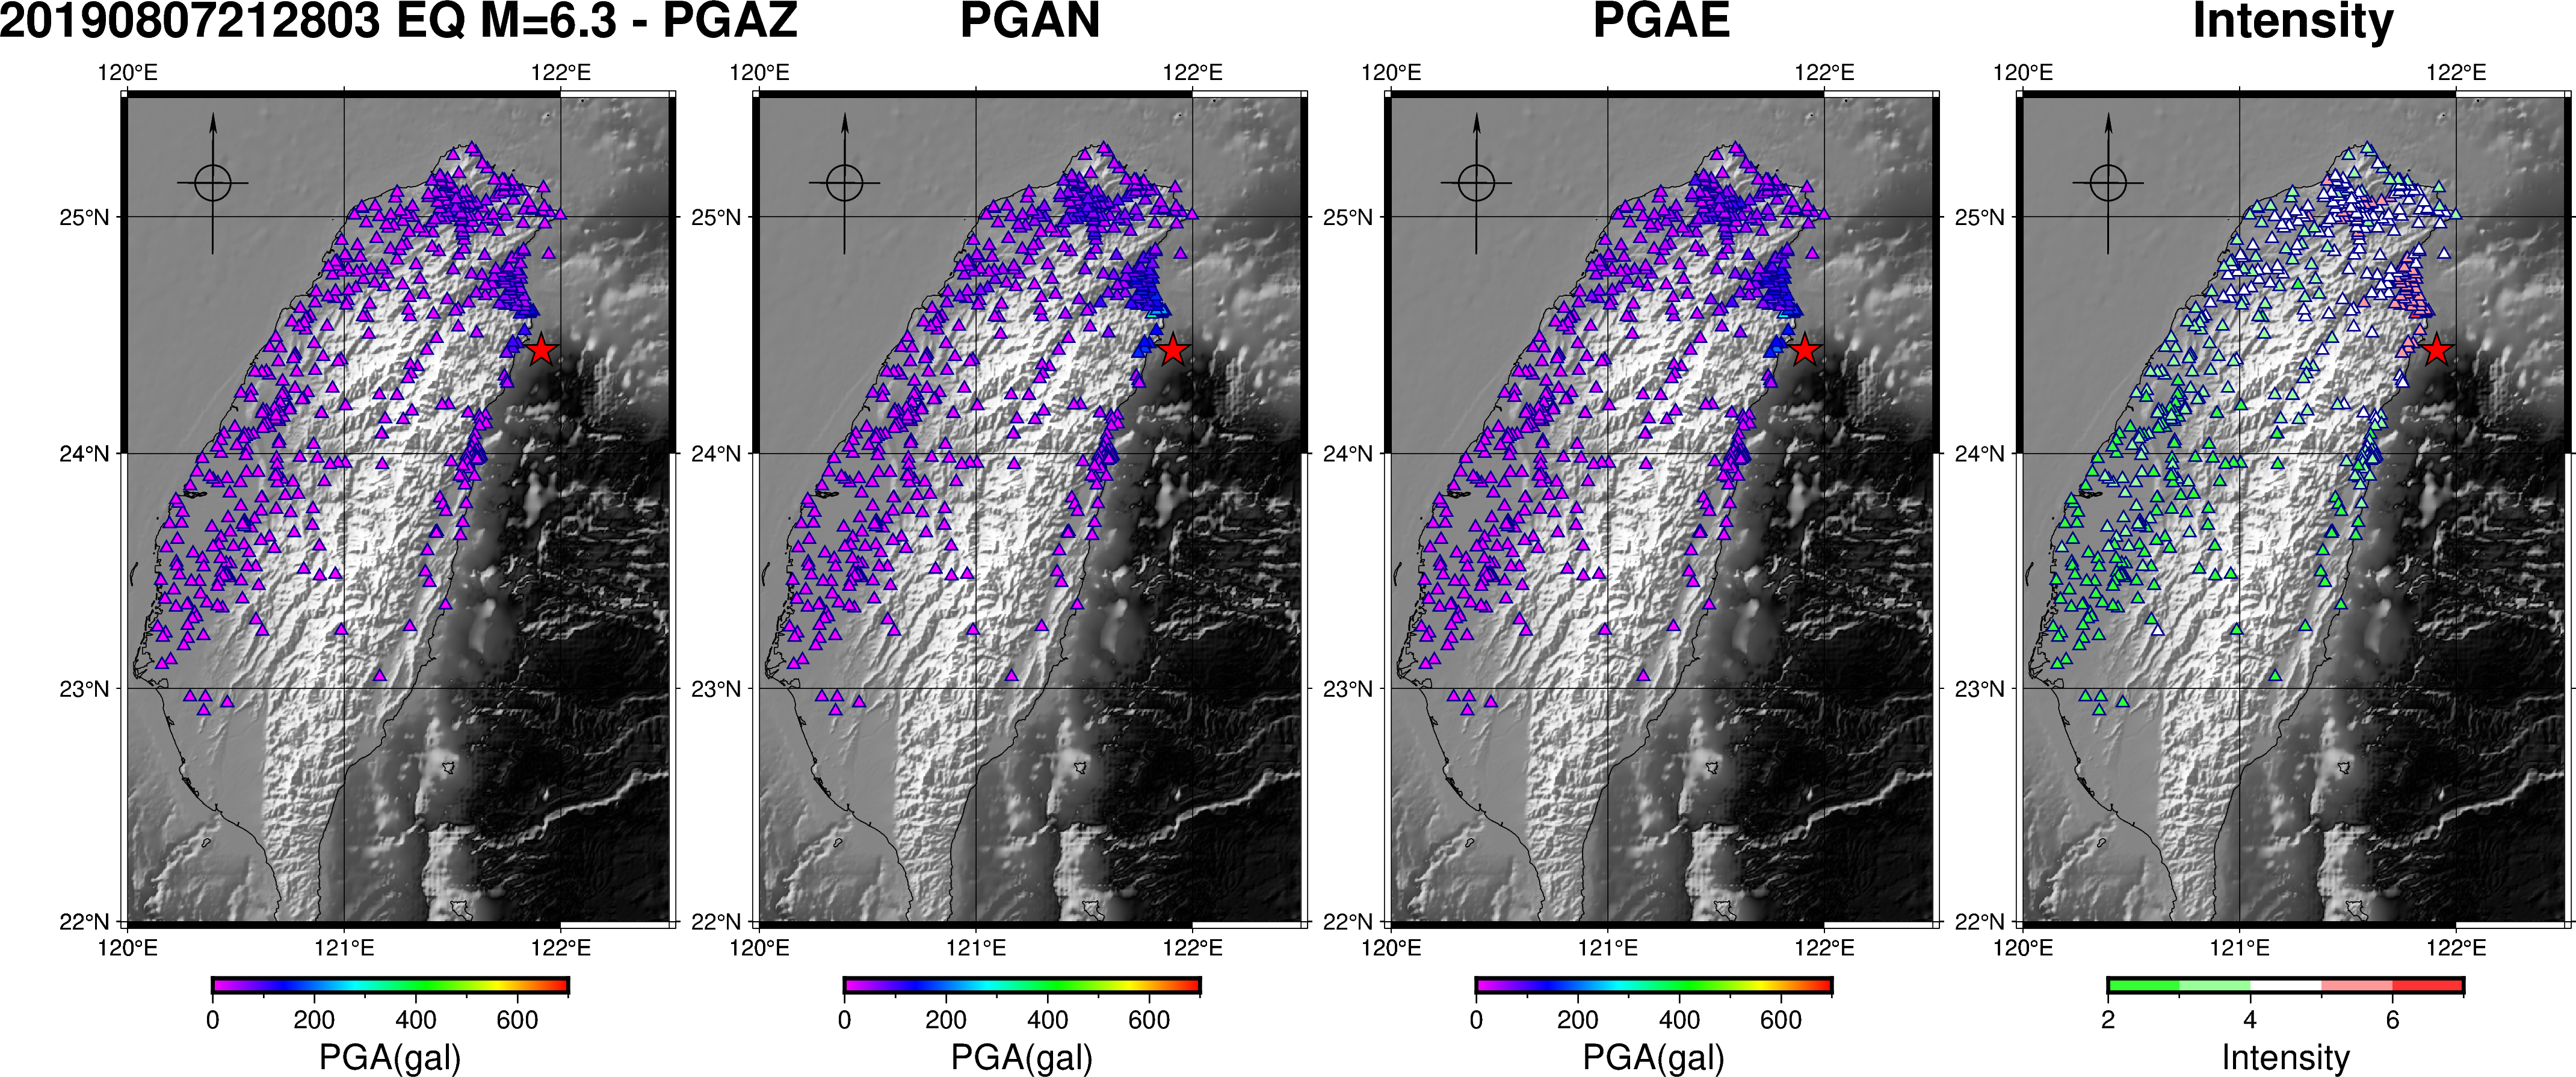

In [15]:
# =================================================================================================================
## Figure 1: PGA for HuaLien earthquake
#==================================================================================================================
import os
import pygmt
import pandas as pd
import numpy as np
import obspy
from obspy import read
from glob import glob
import matplotlib.pyplot as plt
from obspy.clients.iris import Client
from obspy.core import Stream
# --------------------------------------------------------------------------------------
# Reading the data table
table_pre_psa = pd.read_csv(
    '20190807212803.txt',
    skiprows=0,
    delim_whitespace=True,
    names=['Name','lat','long','ele','Intensity','Val1',
           'PGAZ','PGAN','PGAE','DIST','FileName','aItype',
           'Timestamp','Val2'])
# Eq information file
rpfile = 'data//20190807212803//20190807212803.dat';
with open(rpfile,'r',encoding="UTF-8") as f:
    lines = f.readlines()
eqinfor=lines[0];
eqinfor
eqlat1=eqinfor[18:20].strip();eqlat2=eqinfor[20:26].strip();
eqlat=float(eqlat1)+float(eqlat2)/60;
eqlon1=eqinfor[25:28].strip();eqlon2=eqinfor[28:34].strip();
eqlon=float(eqlon1)+float(eqlon2)/60;
eqlat, eqlon
# ------------------------------------------------
fig = pygmt.Figure()
topo_data = '@earth_relief_15s'
# Figure setting
minlon, maxlon = 120, 122.5
minlat, maxlat = 22.0, 25.5
# 
pygmt.makecpt(cmap='gray',series='-3000/3000/100',continuous=True)
#
fig.basemap(
    region=[minlon, maxlon, minlat, maxlat],
    projection='M3i',
    frame=[
        'xafg+l"Latitude (deg)"',
        'yafg+l"Longitude (deg)"',
        'WSen',
    ],
)
# Plot high resolution topographic
fig.grdimage(grid=topo_data, 
#              region=[minlon, maxlon, minlat, maxlat], 
#              projection='M3i', 
             shading=True, 
             frame=False)
#
fig.coast(
    shorelines=True, 
    frame=["a2g1.0",'NSWe+t"20190807212803 EQ M=6.3 - PGAZ"'],
    Td='jTL+o0.2c+w2c',
    borders=["1/1.0p,black,2/1.0p,black,3/1.0p,black,"]
)
#
pygmt.makecpt(
#     cmap='wysiwyg',
    cmap='rainbow',
    series=[0, 700, 1],
    continuous=True,
#     reverse=False
)
fig.plot(
    x=table_pre_psa.long,
    y=table_pre_psa.lat,
    style="t0.08i",
    color=table_pre_psa.PGAZ,
    cmap=True,
    pen="0.5p,darkblue"
)
fig.colorbar(
    frame='+l"PGA(gal)"',
    position='x3.7c/-0.8c+w5c+jTC+h'
            )
# fig.legend(position='JTR+jTR+o0.5c/0.5c',box='+gwhite+p0.5p',transparency=10)
fig.plot(
    x=eqlon,
    y=eqlat,
    style="a0.2i",
    color='red',
#     cmap=True,
    pen="0.5p,black"
)
# --------------------------------------------------------------------------------------
fig.shift_origin(xshift="3.5i")
pygmt.makecpt(cmap='gray',series='-3000/3000/100',continuous=True)
fig.basemap(
    region=[minlon, maxlon, minlat, maxlat],
    projection='M3i',
    frame=[
        'xafg+l"Latitude (deg)"',
        'yafg+l"Longitude (deg)"',
        'WSen',
    ],
)
# Plot high resolution topographic
fig.grdimage(grid=topo_data, 
#              region=[minlon, maxlon, minlat, maxlat], 
#              projection='M3i', 
             shading=True, 
             frame=False)
#
fig.coast(
    shorelines=True, 
    frame=["a2g1.0",'NSwe+t"PGAN"'],
    Td='jTL+o0.2c+w2c',
    borders=["1/1.0p,black,2/1.0p,black,3/1.0p,black,"]
)
#
pygmt.makecpt(
#     cmap='wysiwyg',
    cmap='rainbow',
    series=[0, 700, 1],
    continuous=True,
#     reverse=False
)
fig.plot(
    x=table_pre_psa.long,
    y=table_pre_psa.lat,
    style="t0.08i",
    color=table_pre_psa.PGAN,
    cmap=True,
    pen="0.5p,darkblue"
)
fig.colorbar(
    frame='+l"PGA(gal)"',
    position='x3.7c/-0.8c+w5c+jTC+h'
            )
# fig.legend(position='JTR+jTR+o0.5c/0.5c',box='+gwhite+p0.5p',transparency=10)
fig.plot(
    x=eqlon,
    y=eqlat,
    style="a0.2i",
    color='red',
#     cmap=True,
    pen="0.5p,black"
)
# --------------------------------------------------------------------------------------
fig.shift_origin(xshift="3.5i")
pygmt.makecpt(cmap='gray',series='-3000/3000/100',continuous=True)
fig.basemap(
    region=[minlon, maxlon, minlat, maxlat],
    projection='M3i',
    frame=[
        'xafg+l"Latitude (deg)"',
        'yafg+l"Longitude (deg)"',
        'WSen',
    ],
)
# Plot high resolution topographic
fig.grdimage(grid=topo_data, 
#              region=[minlon, maxlon, minlat, maxlat], 
#              projection='M3i', 
             shading=True, 
             frame=False)
#
fig.coast(
    shorelines=True, 
    frame=["a2g1.0",'NSwe+t"PGAE"'],
    Td='jTL+o0.2c+w2c',
    borders=["1/1.0p,black,2/1.0p,black,3/1.0p,black,"]
)
#
pygmt.makecpt(
#     cmap='wysiwyg',
    cmap='rainbow',
    series=[0, 700, 1],
    continuous=True,
#     reverse=False
)
fig.plot(
    x=table_pre_psa.long,
    y=table_pre_psa.lat,
    style="t0.08i",
    color=table_pre_psa.PGAE,
    cmap=True,
    pen="0.5p,darkblue"
)
fig.colorbar(
    frame='+l"PGA(gal)"',
    position='x3.7c/-0.8c+w5c+jTC+h'
            )
# fig.legend(position='JTR+jTR+o0.5c/0.5c',box='+gwhite+p0.5p',transparency=10)
fig.plot(
    x=eqlon,
    y=eqlat,
    style="a0.2i",
    color='red',
#     cmap=True,
    pen="0.5p,black"
)
# --------------------------------------------------------------------------------------
# fig.shift_origin(xshift="3.5i")
# pygmt.makecpt(cmap='gray',series='-3000/3000/100',continuous=True)
# fig.basemap(
#     region=[minlon, maxlon, minlat, maxlat],
#     projection='M3i',
#     frame=[
#         'xafg+l"Latitude (deg)"',
#         'yafg+l"Longitude (deg)"',
#         'WSen',
#     ],
# )
# # Plot high resolution topographic
# fig.grdimage(grid=topo_data, 
# #              region=[minlon, maxlon, minlat, maxlat], 
# #              projection='M3i', 
#              shading=True, 
#              frame=False)
# #
# fig.coast(
#     shorelines=True, 
#     frame=["a2g1.0",'NSwe+t"PGA-symmetrical"'],
#     Td='jTL+o0.2c+w2c',
#     borders=["1/1.0p,black,2/1.0p,black,3/1.0p,black,"]
# )
# #
# pygmt.makecpt(
# #     cmap='wysiwyg',
#     cmap='rainbow',
#     series=[0, 700, 1],
#     continuous=True,
# #     reverse=False
# )
# fig.plot(
#     x=table_pre_psa.long,
#     y=table_pre_psa.lat,
#     style="t0.08i",
#     color=np.sqrt(table_pre_psa.PGAE**2+table_pre_psa.PGAN**2),
#     cmap=True,
#     pen="0.5p,darkblue"
# )
# fig.colorbar(
#     frame='+l"PGA(gal)"',
#     position='x3.7c/-0.8c+w5c+jTC+h'
#             )
# # fig.legend(position='JTR+jTR+o0.5c/0.5c',box='+gwhite+p0.5p',transparency=10)
# fig.plot(
#     x=eqlon,
#     y=eqlat,
#     style="a0.2i",
#     color='red',
# #     cmap=True,
#     pen="0.5p,black"
# )
# # --------------------------------------------------------------------------------------
fig.shift_origin(xshift="3.5i")
pygmt.makecpt(cmap='gray',series='-3000/3000/100',continuous=True)
fig.basemap(
    region=[minlon, maxlon, minlat, maxlat],
    projection='M3i',
    frame=[
        'xafg+l"Latitude (deg)"',
        'yafg+l"Longitude (deg)"',
        'WSen',
    ],
)
# Plot high resolution topographic
fig.grdimage(grid=topo_data, 
#              region=[minlon, maxlon, minlat, maxlat], 
#              projection='M3i', 
             shading=True, 
             frame=False)
#
fig.coast(
    shorelines=True, 
    frame=["a2g1.0",'NSwe+t"Intensity"'],
    Td='jTL+o0.2c+w2c',
    borders=["1/1.0p,black,2/1.0p,black,3/1.0p,black,"]
)
#
pygmt.makecpt(
#     cmap='wysiwyg',
    cmap='red2green',
    series=[2, 7, 1],
    continuous=False,
    reverse=True
)
fig.plot(
    x=table_pre_psa.long,
    y=table_pre_psa.lat,
    style="t0.08i",
    color=(table_pre_psa.Intensity),
    cmap=True,
    pen="0.5p,darkblue"
)
fig.colorbar(
    frame='+l"Intensity"',
    position='x3.7c/-0.8c+w5c+jTC+h'
            )
# fig.legend(position='JTR+jTR+o0.5c/0.5c',box='+gwhite+p0.5p',transparency=10)
fig.plot(
    x=eqlon,
    y=eqlat,
    style="a0.2i",
    color='red',
#     cmap=True,
    pen="0.5p,black"
)
#
fig.show()
# fig.show(method='external')
fig.savefig('20190807212803.png')

In [347]:
table_post_psa.Dist
table_post_psa['Te=0.1']

0      303.790434
1      442.633059
2      467.801542
3      457.035554
4      391.020346
          ...    
525     43.912099
526     41.623797
527     83.336638
528      7.136354
529      7.403200
Name: Te=0.1, Length: 530, dtype: float64

NameError: name 'table_post_psa' is not defined

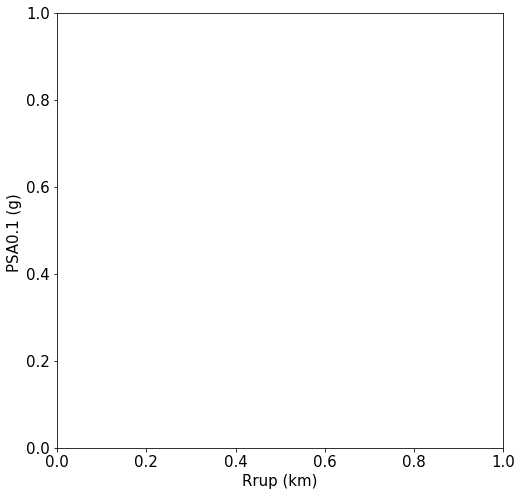

In [384]:
# Plot the data for 
import pygmt
import obspy
from obspy import read
from obspy.clients.iris import Client
from obspy.core import Stream

#
#
fig,ax = plt.subplots(1,1,figsize=(8,8),frameon=True)
plt.xlabel('Rrup (km)',fontsize=15)
plt.ylabel('PSA0.1 (g) ',fontsize=15)
plt.tick_params('x',labelsize=15)
plt.tick_params('y',labelsize=15)

ax.semilogy(table_post_psa['Val1'],
        table_post_psa['Te=0.1']/981,
        'o',
        color="black",
        markerfacecolor='none',
        lw=0.5,
        label="E"
       )
ax.semilogy(table_post_psa['Val1'],
        table_post_psa['Tn=0.1']/981,
        'o',
        color="blue",
        markerfacecolor='none',
        lw=0.5,
        label="N"
       )
#
ax.grid(True)
ax.legend()
fname = dirc+"_0.1.png"
plt.savefig(fname)
plt.show()
#

In [391]:
def dist_harversine(elat,elong,slat,slong):
    import numpy as np
    import math as m
    '''
    Calculate the great circle distance between 2 points using Haversine formula
    input:  + elat: source latitude - real
            + elong: source longitude - real
            + slat: receiver latitude - real
            + slong: receiver longitude - real
    output: + dist: distance in kilometer (real)
    '''
#
    elat = np.deg2rad(elat);elong = np.deg2rad(elong);
    slat = np.deg2rad(slat);slong = np.deg2rad(slong);
    #
    dlat = np.diff([elat, slat]);
    dlong = np.diff([elong, slong]);
    #
    a=m.sin(dlat/2)**2+m.cos(elat)*m.cos(slat)*m.sin(dlong/2)**2;
    c=2*m.atan2(m.sqrt(a),m.sqrt(1-a));
    R =  6378160; # In metter
    #
    dist=round((R*c)/1000,2);
    return dist

(17738, 4)

process the data file: 0 data//20190807212803//01821900.CVA.txt
process the data file: 1 data//20190807212803//50621900.MNS.txt
process the data file: 2 data//20190807212803//C9821900.SMT.txt
process the data file: 3 data//20190807212803//D4021901.SMT.txt
process the data file: 4 data//20190807212803//E9121900.SMT.txt
process the data file: 5 data//20190807212803//63414300.EVT.txt
process the data file: 6 data//20190807212803//06421900.CVA.txt
process the data file: 7 data//20190807212803//D0621900.SMT.txt
process the data file: 8 data//20190807212803//05921900.CVA.txt
process the data file: 9 data//20190807212803//08521900.CVA.txt
process the data file: 10 data//20190807212803//E9821900.SMT.txt
process the data file: 11 data//20190807212803//T061001.356.txt
process the data file: 12 data//20190807212803//02021900.CVA.txt
process the data file: 13 data//20190807212803//C8021900.SMT.txt
process the data file: 14 data//20190807212803//D0921900.SMT.txt
process the data file: 15 data//2019

process the data file: 126 data//20190807212803//10521900.MNS.txt
process the data file: 127 data//20190807212803//13421900.CVA.txt
process the data file: 128 data//20190807212803//01521900.CVA.txt
process the data file: 129 data//20190807212803//41821900.MNS.txt
process the data file: 130 data//20190807212803//T017001.356.txt
process the data file: 131 data//20190807212803//39321900.MNS.txt
process the data file: 132 data//20190807212803//33921900.MNS.txt
process the data file: 133 data//20190807212803//24921900.MNS.txt
process the data file: 134 data//20190807212803//T567001.219.txt
process the data file: 135 data//20190807212803//41121900.MNS.txt
process the data file: 136 data//20190807212803//22321900.MNS.txt
process the data file: 137 data//20190807212803//40221900.MNS.txt
process the data file: 138 data//20190807212803//F3821900.SMT.txt
process the data file: 139 data//20190807212803//42321900.MNS.txt
process the data file: 140 data//20190807212803//N2621900.SMT.txt
process the 

process the data file: 251 data//20190807212803//B9121900.SMT.txt
process the data file: 252 data//20190807212803//18621900.MNS.txt
process the data file: 253 data//20190807212803//37521900.MNS.txt
process the data file: 254 data//20190807212803//F1621906.SMT.txt
process the data file: 255 data//20190807212803//F8135600.EVT.txt
process the data file: 256 data//20190807212803//24421900.MNS.txt
process the data file: 257 data//20190807212803//30621900.MNS.txt
process the data file: 258 data//20190807212803//D5921900.SMT.txt
process the data file: 259 data//20190807212803//T493001.219.txt
process the data file: 260 data//20190807212803//19321900.MNS.txt
process the data file: 261 data//20190807212803//10721900.MNS.txt
process the data file: 262 data//20190807212803//T091001.356.txt
process the data file: 263 data//20190807212803//C9921900.SMT.txt
process the data file: 264 data//20190807212803//24821900.MNS.txt
process the data file: 265 data//20190807212803//45921900.MNS.txt
process the 

process the data file: 376 data//20190807212803//16521900.MNS.txt
process the data file: 377 data//20190807212803//41621900.MNS.txt
process the data file: 378 data//20190807212803//17721900.MNS.txt
process the data file: 379 data//20190807212803//N0421900.SMT.txt
process the data file: 380 data//20190807212803//L4621900.SMT.txt
process the data file: 381 data//20190807212803//57821900.MNS.txt
process the data file: 382 data//20190807212803//51121900.MNS.txt
process the data file: 383 data//20190807212803//48921900.MNS.txt
process the data file: 384 data//20190807212803//49721900.MNS.txt
process the data file: 385 data//20190807212803//L7721900.SMT.txt
process the data file: 386 data//20190807212803//J0721900.SMT.txt
process the data file: 387 data//20190807212803//L5421900.SMT.txt
process the data file: 388 data//20190807212803//F0721900.SMT.txt
process the data file: 389 data//20190807212803//L5821900.SMT.txt
process the data file: 390 data//20190807212803//49621900.MNS.txt
process th

process the data file: 501 data//20190807212803//15535600.CVA.txt
process the data file: 502 data//20190807212803//31221900.MNS.txt
process the data file: 503 data//20190807212803//12921900.MNS.txt
process the data file: 504 data//20190807212803//34621900.MNS.txt
process the data file: 505 data//20190807212803//50321900.MNS.txt
process the data file: 506 data//20190807212803//49921900.MNS.txt
process the data file: 507 data//20190807212803//D9321900.SMT.txt
process the data file: 508 data//20190807212803//38921900.MNS.txt
process the data file: 509 data//20190807212803//N5621900.SMT.txt
process the data file: 510 data//20190807212803//37421900.MNS.txt
process the data file: 511 data//20190807212803//49421900.MNS.txt
process the data file: 512 data//20190807212803//48821900.MNS.txt
process the data file: 513 data//20190807212803//50721900.MNS.txt
process the data file: 514 data//20190807212803//56821900.MNS.txt
process the data file: 515 data//20190807212803//32621900.MNS.txt
process th

['Tz=10.0',
 'Tz=9.12',
 'Tz=8.318',
 'Tz=7.586',
 'Tz=6.918',
 'Tz=6.31',
 'Tz=5.754',
 'Tz=5.248',
 'Tz=4.786',
 'Tz=4.365',
 'Tz=3.981',
 'Tz=3.631',
 'Tz=3.311',
 'Tz=3.02',
 'Tz=2.754',
 'Tz=2.512',
 'Tz=2.291',
 'Tz=2.089',
 'Tz=1.905',
 'Tz=1.738',
 'Tz=1.585',
 'Tz=1.445',
 'Tz=1.318',
 'Tz=1.202',
 'Tz=1.096',
 'Tz=1.0',
 'Tz=0.912',
 'Tz=0.832',
 'Tz=0.759',
 'Tz=0.692',
 'Tz=0.631',
 'Tz=0.575',
 'Tz=0.525',
 'Tz=0.479',
 'Tz=0.437',
 'Tz=0.398',
 'Tz=0.363',
 'Tz=0.331',
 'Tz=0.302',
 'Tz=0.275',
 'Tz=0.251',
 'Tz=0.229',
 'Tz=0.209',
 'Tz=0.191',
 'Tz=0.174',
 'Tz=0.158',
 'Tz=0.145',
 'Tz=0.132',
 'Tz=0.12',
 'Tz=0.11',
 'Tz=0.1',
 'Tz=10.0',
 'Tz=9.12',
 'Tz=8.318',
 'Tz=7.586',
 'Tz=6.918',
 'Tz=6.31',
 'Tz=5.754',
 'Tz=5.248',
 'Tz=4.786',
 'Tz=4.365',
 'Tz=3.981',
 'Tz=3.631',
 'Tz=3.311',
 'Tz=3.02',
 'Tz=2.754',
 'Tz=2.512',
 'Tz=2.291',
 'Tz=2.089',
 'Tz=1.905',
 'Tz=1.738',
 'Tz=1.585',
 'Tz=1.445',
 'Tz=1.318',
 'Tz=1.202',
 'Tz=1.096',
 'Tz=1.0',
 'Tz=0.912',
 '

In [ ]:
# ## Plot trace
# # fig,ax = plt.subplots(3,1,figsize=(6,4),frameon=True)
# fig = plt.figure()
# gs = fig.add_gridspec(3, 2)
# # ---------------------------------------------------------------------------------------
# ax1 = fig.add_subplot(gs[0, 0])
# ax1.plot(fdata.time,fdata.Z,color="black",lw=0.5,label="Z")
# ax1.legend()
# # ax1.axis('off')
# ax1.get_xaxis().set_visible(False)
# # plt.xlabel('Time (sec)',fontsize=12)
# # plt.ylabel('Aceleration (gal) ',fontsize=12)
# # plt.tick_params('x',labelsize=11)
# # plt.tick_params('y',labelsize=11)
# #
# ax2 = fig.add_subplot(gs[1, 0])
# ax2.plot(fdata.time,fdata.N,color="black",lw=0.5,label="N")
# ax2.legend()
# ax2.get_xaxis().set_visible(False)
# # plt.xlabel('Time (sec)',fontsize=12)
# plt.ylabel('Aceleration (gal) ',fontsize=12)
# # plt.tick_params('x',labelsize=11)
# # plt.tick_params('y',labelsize=11)
# #
# ax2 = fig.add_subplot(gs[2, 0])
# ax2.plot(fdata.time,fdata.E,color="black",lw=0.5,label="E")
# ax2.legend()
# plt.xlabel('Time (sec)',fontsize=12)
# # plt.ylabel('Aceleration (gal) ',fontsize=12)
# # plt.tick_params('x',labelsize=11)
# # plt.tick_params('y',labelsize=11)
# # ---------------------------------------------------------------------------------
# ax3 = fig.add_subplot(gs[0, 1])
# ax3.plot(psaz.osc_freq,psaz.spec_accel,color="blue",lw=1.0,label="Z")
# ax3.legend()
# ax3.get_xaxis().set_visible(False)
# ax3.set(xlabel='Frequency (Hz)', xscale='log', alpha=0.5)
# #
# ax4 = fig.add_subplot(gs[1, 1])
# ax4.plot(psan.osc_freq,psan.spec_accel,color="blue",lw=1.0,label="N")
# ax4.legend()
# ax4.get_xaxis().set_visible(False)
# ax4.set(xlabel='Frequency (Hz)', xscale='log', alpha=0.5)
# #
# ax5 = fig.add_subplot(gs[2, 1])
# ax5.plot(psae.osc_freq,psae.spec_accel,color="blue",lw=1.0,label="E")
# ax5.legend()
# ax5.set(xlabel='Frequency (Hz)', xscale='log', alpha=0.5)
# #
# plt.show()

In [191]:
dfz = psaz.spec_accel.reshape([1,len(psaz.spec_accel)])
dfn = psan.spec_accel.reshape([1,len(psan.spec_accel)])
dfe = psae.spec_accel.reshape([1,len(psae.spec_accel)])
textz = [];textn = [];texte = [];
for i,freq in enumerate (psaz.osc_freq):
#     print(i,freq) 
    txtz = 'Tz=%s' % np.round(1/freq,3)
    txtn = 'Tn=%s' % np.round(1/freq,3)
    txte = 'Te=%s' % np.round(1/freq,3)
    textz.append(txtz)
    textn.append(txtn)
    texte.append(txte)
# text.reshape([1,49])
text1z = textz.copy();text1n = textn.copy();text1e = texte.copy();
text1z.reverse();text1n.reverse();text1e.reverse();
ddfz = pd.DataFrame(np.fliplr(dfz),columns=text1z);
ddfn = pd.DataFrame(np.fliplr(dfn),columns=text1n);
ddfe = pd.DataFrame(np.fliplr(dfe),columns=text1e)
psa = pd.concat([ddfe,ddfn,ddfz],axis=1)

In [192]:
psa

,Te=0.1,Te=0.11,Te=0.12,Te=0.132,Te=0.145,Te=0.158,Te=0.174,Te=0.191,Te=0.209,Te=0.229,...,Tz=4.365,Tz=4.786,Tz=5.248,Tz=5.754,Tz=6.31,Tz=6.918,Tz=7.586,Tz=8.318,Tz=9.12,Tz=10.0
0,6.20358,6.49194,6.864727,8.118644,9.83806,11.406822,12.119372,13.541354,16.482204,21.393028,...,0.550728,0.510272,0.515999,0.525174,0.41555,0.355237,0.338516,0.320947,0.288297,0.263924


In [185]:
ddf = psaz.spec_accel.reshape([1,len(psaz.spec_accel)])

text = []
for i,freq in enumerate (psaz.osc_freq):
#     print(i,freq) 
    txt = 'Tz=%s' % np.round(1/freq,3)
    text.append(txt)
# text.reshape([1,49])
text1 = text.copy()
text1.reverse()
ddf1 = pd.DataFrame(np.fliplr(ddf),columns=text1)
ddf1

,Tz=0.1,Tz=0.11,Tz=0.12,Tz=0.132,Tz=0.145,Tz=0.158,Tz=0.174,Tz=0.191,Tz=0.209,Tz=0.229,...,Tz=4.365,Tz=4.786,Tz=5.248,Tz=5.754,Tz=6.31,Tz=6.918,Tz=7.586,Tz=8.318,Tz=9.12,Tz=10.0
0,3.992789,3.81642,3.548117,3.545021,4.083826,4.486454,5.04391,4.912449,4.557809,4.373124,...,0.550728,0.510272,0.515999,0.525174,0.41555,0.355237,0.338516,0.320947,0.288297,0.263924


In [186]:
text1

['Tz=0.1',
 'Tz=0.11',
 'Tz=0.12',
 'Tz=0.132',
 'Tz=0.145',
 'Tz=0.158',
 'Tz=0.174',
 'Tz=0.191',
 'Tz=0.209',
 'Tz=0.229',
 'Tz=0.251',
 'Tz=0.275',
 'Tz=0.302',
 'Tz=0.331',
 'Tz=0.363',
 'Tz=0.398',
 'Tz=0.437',
 'Tz=0.479',
 'Tz=0.525',
 'Tz=0.575',
 'Tz=0.631',
 'Tz=0.692',
 'Tz=0.759',
 'Tz=0.832',
 'Tz=0.912',
 'Tz=1.0',
 'Tz=1.096',
 'Tz=1.202',
 'Tz=1.318',
 'Tz=1.445',
 'Tz=1.585',
 'Tz=1.738',
 'Tz=1.905',
 'Tz=2.089',
 'Tz=2.291',
 'Tz=2.512',
 'Tz=2.754',
 'Tz=3.02',
 'Tz=3.311',
 'Tz=3.631',
 'Tz=3.981',
 'Tz=4.365',
 'Tz=4.786',
 'Tz=5.248',
 'Tz=5.754',
 'Tz=6.31',
 'Tz=6.918',
 'Tz=7.586',
 'Tz=8.318',
 'Tz=9.12',
 'Tz=10.0']

/tmp/ipykernel_63687/2252685341.py:56: RuntimeWarning: divide by zero encountered in double_scalars
  omega = 2.*np.pi/T[j];
/tmp/ipykernel_63687/2252685341.py:64: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  AeB = np.matmul((np.linalg.lstsq(A,(Ae-np.eye(2)))[0]),D);


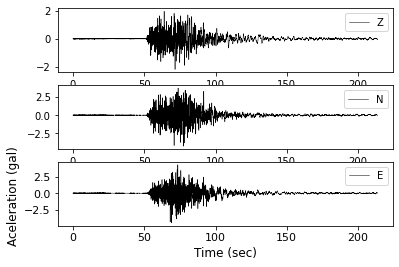

In [45]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import sys,glob
# Calculate the PSA
onlyfiles = glob.glob("data//20180206155041"+'//*.txt')
for ii, filename in enumerate (onlyfiles):
    filename = onlyfiles[0]
fdata = pd.read_csv(
    filename,
    skiprows=11,
    delim_whitespace=True,
    names=['time','Z','N','E']
)
## ---------------------------------------------------------------------------------------------------------------
def do_psa(data,endp,dt,damp):
    import numpy as np
    import math
    from math import sqrt
    from scipy.linalg import expm
    """
    Evalueates the PSA using the NEwmark-Beta methodology
    Input: 
        + data: the acceleration data in gal (cm/s**2)
        + endp: the period of spectral (e.g. 5 sec)
        + dt: time step (e.g. 0.01 sec)
        + damp: cristical damping (e.g. 0.05 = 5%)
    Output: 
        + PSA, SA
        + PSV, SV
        + SD
    Create date: 2022/02/24
    Creator: havinhlong1988@g.ncu.edu.tw
    Comment: Why it run to slow 
    """
    # Pre-allocate arrays
    T = np.arange(0,endp,dt);
    omega = np.zeros((round(endp/dt),1));
    y = np.zeros((2,len(data)))
    A = np.zeros((2,2));
    D = np.zeros((2,1));
    displ_max = np.zeros((round(endp/dt),1));
    veloc_max = np.zeros((round(endp/dt),1));
    absacc_max = np.zeros((round(endp/dt),1));
    foverm_max = np.zeros((round(endp/dt),1));
    #
    SD=np.zeros((round(endp/dt),1))
    SV=np.zeros((round(endp/dt),1))
    SA=np.zeros((round(endp/dt),1))
    PSV=np.zeros((round(endp/dt),1))
    PSA=np.zeros((round(endp/dt),1))
# The data response of SODF oscillator
#
    #
    for j in range(0,(round(endp/dt))):
        omega = 2.*np.pi/T[j];
        if (np.isinf(omega)==True):
            omega=0
        cval = 2.*damp*omega;
        kval = omega**2.;
        A[0,1]=1; A[1,0] = -kval; A[1,1] = -cval;
        Ae = expm(A*dt);
        D[1,0] = 1; 
        AeB = np.matmul((np.linalg.lstsq(A,(Ae-np.eye(2)))[0]),D);
        for k in range (0,len(data)):
            y[:,k] = np.matmul(Ae,y[:,k-1]) + np.matmul(AeB,[data[k]]);
        # Extract some value
        displ = np.matrix.transpose(y[0,:]); # Relative displacement vector (cm)
        veloc = np.matrix.transpose(y[1,:]); # Relative velocity (cm/s)
        foverm = (omega**2)*displ;           # Lateral resisting force over mass (cm/s**2)
        absacc = -2*damp*omega*veloc-foverm; # Absolute acceleration from equilibrium (cm/s**2)
        # Extract peak value
        SD[j] = np.max(np.abs(displ));             # Spectral relative displacement (cm)
        SV[j] = np.max(np.abs(veloc));             # Spectral relative velocity (cm/s)
        SA[j] = np.max(np.abs(absacc));           # Spectral absolute acceleration (cm/s**2)
        foverm_max[j] = np.max(np.abs(foverm));           # Spectral value of lateral resisting force over mass (cm/s**2)
        PSA[j] = SD[j]*omega**2;  # Pseudo spectral acceleration (cm/s)
        PSV[j] = SD[j]*omega;  # Pseudo spectral velocity (cm/s)
        # Correct the 1st value
        SD[0] = 0;SV[0] = 0;SA[0] = 0;
#         PSV[0:1,0]=0; PSA[0:1,0]=np.max(np.abs(data));
        # Extract the time series of acceleration, velocity and displacement response of SODF oscillator
        #     acc[:,j] = absacc;
        #     OUT.vel(:,i) = veloc;
        #     OUT.disp(:,i) = displ;
#     return T, PSA, SA, PSV, SV, SD
    return T, PSA,PSV, SD
## ---------------------------------------------------------------------------------------------------------------
#
T, PSAZ, PSVZ, SDZ = do_psa(fdata.Z,5,0.005,0.05)
#
T, PSAN, PSVN, SDN = do_psa(fdata.N,5,0.005,0.05)
#
T, PSAE, PSVE, SDE = do_psa(fdata.E,5,0.005,0.05)

## Plot trace
fig,ax = plt.subplots(3,1,figsize=(6,4),frameon=True)
plt.xlabel('Time (sec)',fontsize=12)
plt.ylabel('Aceleration (gal) ',fontsize=12)
plt.tick_params('x',labelsize=11)
plt.tick_params('y',labelsize=11)
ax[0].plot(fdata.time,fdata.Z,color="black",lw=0.5,label="Z")
ax[0].legend()
ax[1].plot(fdata.time,fdata.N,color="black",lw=0.5,label="N")
ax[1].legend()
ax[2].plot(fdata.time,fdata.E,color="black",lw=0.5,label="E")
ax[2].legend()
plt.show()

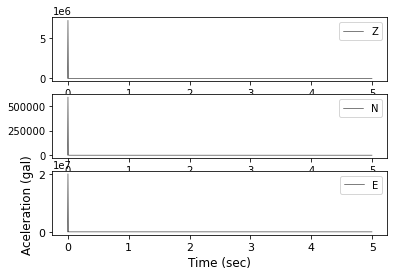

NameError: name 'PSA' is not defined

In [47]:
fig,ax = plt.subplots(3,1,figsize=(6,4),frameon=True)
plt.xlabel('Time (sec)',fontsize=12)
plt.ylabel('Aceleration (gal) ',fontsize=12)
plt.tick_params('x',labelsize=11)
plt.tick_params('y',labelsize=11)
ax[0].plot(T,PSAZ,color="black",lw=0.5,label="Z")
ax[0].legend()
ax[1].plot(T,PSAN,color="black",lw=0.5,label="N")
ax[1].legend()
ax[2].plot(T,PSAE,color="black",lw=0.5,label="E")
ax[2].legend()
plt.show()
PSA

In [144]:
def do_psa(data,endp,dt,damp):
    import numpy as np
    import math
    from math import sqrt
    from scipy.linalg import expm
    """
    Evalueates the PSA using the NEwmark-Beta methodology
    Input: 
        + data: the acceleration data in gal (cm/s**2)
        + endp: the period of spectral (e.g. 5 sec)
        + dt: time step (e.g. 0.01 sec)
        + damp: cristical damping (e.g. 0.05 = 5%)
    Output: 
        + PSA, SA
        + PSV, SV
        + SD
    Create date: 2022/02/24
    Creator: havinhlong1988@g.ncu.edu.tw
    Comment: Why it run to slow 
    """
    # Pre-allocate arrays
    T = np.arange(0,endp,dt);
    omega = np.zeros((round(endp/dt),1));
    y = np.zeros((2,len(data)))
    A = np.zeros((2,2));
    D = np.zeros((2,1));
    displ_max = np.zeros((round(endp/dt),1));
    veloc_max = np.zeros((round(endp/dt),1));
    absacc_max = np.zeros((round(endp/dt),1));
    foverm_max = np.zeros((round(endp/dt),1));
    #
    SD=np.zeros((round(endp/dt),1))
    SV=np.zeros((round(endp/dt),1))
    SA=np.zeros((round(endp/dt),1))
    PSV=np.zeros((round(endp/dt),1))
    PSA=np.zeros((round(endp/dt),1))
# The data response of SODF oscillator
#
    #
    for j in range(0,(round(endp/dt))):
        omega = 2.*np.pi/T[j];
        if (np.isinf(omega)==True):
            omega=0
        cval = 2.*damp*omega;
        kval = omega**2.;
        A[0,1]=1; A[1,0] = -kval; A[1,1] = -cval;
        Ae = expm(A*dt);
        D[1,0] = 1; 
        AeB = np.matmul((np.linalg.lstsq(A,(Ae-np.eye(2)))[0]),D);
        for k in range (0,len(data)):
            y[:,k] = np.matmul(Ae,y[:,k-1]) + np.matmul(AeB,[data[k]]);
        # Extract some value
        displ = np.matrix.transpose(y[0,:]); # Relative displacement vector (cm)
        veloc = np.matrix.transpose(y[1,:]); # Relative velocity (cm/s)
        foverm = (omega**2)*displ;           # Lateral resisting force over mass (cm/s**2)
        absacc = -2*damp*omega*veloc-foverm; # Absolute acceleration from equilibrium (cm/s**2)
        # Extract peak value
        SD[j] = np.max(np.abs(displ));             # Spectral relative displacement (cm)
        SV[j] = np.max(np.abs(veloc));             # Spectral relative velocity (cm/s)
        SA[j] = np.max(np.abs(absacc));           # Spectral absolute acceleration (cm/s**2)
        foverm_max[j] = np.max(np.abs(foverm));           # Spectral value of lateral resisting force over mass (cm/s**2)
        PSA[j] = SD[j]*omega**2;  # Pseudo spectral acceleration (cm/s)
        PSV[j] = SD[j]*omega;  # Pseudo spectral velocity (cm/s)
        # Correct the 1st value
        SD[0] = 0;SV[0] = 0;SA[0] = 0;
        PSV[0:1,0]=0; PSA[0:1,0]=np.max(np.abs(data));
        # Extract the time series of acceleration, velocity and displacement response of SODF oscillator
        #     acc[:,j] = absacc;
        #     OUT.vel(:,i) = veloc;
        #     OUT.disp(:,i) = displ;
    return T, PSA, SA, PSV, SV, SD
#
T, PSA, SA, PSV, SV, SD = do_psa(fdata.Z,5,0.005,0.05)

array([[0.00000000e+00],
       [1.75082307e+07],
       [5.87675427e+00],
       [5.81331807e+00],
       [5.90159142e+00],
       [5.90261344e+00],
       [5.92065569e+00],
       [6.03758215e+00],
       [6.17220907e+00],
       [6.22511942e+00],
       [6.53740472e+00],
       [6.98252574e+00],
       [7.31812291e+00],
       [7.91804250e+00],
       [8.49164317e+00],
       [8.97553805e+00],
       [1.08894140e+01],
       [1.34809416e+01],
       [1.28387352e+01],
       [1.20576423e+01],
       [1.45156434e+01],
       [1.49636714e+01],
       [1.42404120e+01],
       [1.46554624e+01],
       [1.54896633e+01],
       [1.69101858e+01],
       [2.10799424e+01],
       [2.15033072e+01],
       [1.80959210e+01],
       [1.47146056e+01],
       [1.57932630e+01],
       [1.62043532e+01],
       [1.66723857e+01],
       [1.61596820e+01],
       [1.43158142e+01],
       [1.43403024e+01],
       [1.57422950e+01],
       [1.64688886e+01],
       [1.64087215e+01],
       [1.60095682e+01],


In [ ]:
# print("A=",A)
# print("Ae=",Ae)
# print("CC=",Ae-np.eye(2))
np.array(A)/np.array((Ae-np.eye(2)))
np.linalg.lstsq(A,(Ae-np.eye(2)))[0]
AeB
np.shape(y)
np.shape(displ)
foverm
absacc
max(np.abs(displ))
print(j,displ_max[j])
print(j,veloc_max[j])
print(j,absacc_max[j])
PSA

In [35]:
import numpy as np
import math
from math import sqrt
from scipy.linalg import expm
"""
Evalueates the PSA using the NEwmark-Beta methodology
"""
# Asign the test
data = None
data = fdata.Z;
#
endp=5;
dt=0.005;
damp = 0.05
# Pre-allocate arrays
T = np.arange(0,endp,dt)
omega = np.zeros((round(endp/dt),1))
y = np.ones((2,len(data)))
A = np.zeros((2,2))
D = np.zeros((2,1))
#
SD=np.zeros((round(endp/dt),1))
SV=np.zeros((round(endp/dt),1))
SA=np.zeros((round(endp/dt),1))
PSV=np.zeros((round(endp/dt),1))
PSA=np.zeros((round(endp/dt),1))
#

u = np.zeros((len(data),1));
v = np.zeros((len(data),1));
ac = np.zeros((len(data),1));
# data = np.append(data, 0) # add 1 more data at the end of the array
# T[0,0]=0.00;
    #
for j in range(0,2): #(round(endp/dt)):
    omega = 2.*np.pi/T[j];
    if (np.isinf(omega)==True):
        omega=0
    cval = 2.*damp*omega;
    kval = omega**2.;
    A[0,1]=1; A[1,0] = -kval; A[1,1] = -cval;
    Ae = expm(A*dt);
    D[1,0] = 1; 
    AeB = np.matmul(np.matmul(A,np.transpose(Ae-np.eye(2))),D);
    for k in range (1,len(data)):
        y[:,k] = np.matmul(Ae,y[:,k-1]) + np.matmul(AeB,[data[k]]);

array([[ 0.00000000e+00,  1.00000000e+00],
       [-1.57913670e+06, -1.25663706e+02]])

In [8]:
# Read the specific data file in the directory
import os
from os import listdir
from os.path import isfile, join
import glob
import pandas as pd
# -----------------------------------------------------------------------------------------------------------------
def dist_harversine(elat,elong,slat,slong):
    import numpy as np
    import math as m
    '''
    Calculate the great circle distance between 2 points using Haversine formula
    input:  + elat: source latitude - real
            + elong: source longitude - real
            + slat: receiver latitude - real
            + slong: receiver longitude - real
    output: + dist: distance in kilometer (real)
    '''
#
    elat = np.deg2rad(elat);elong = np.deg2rad(elong);
    slat = np.deg2rad(slat);slong = np.deg2rad(slong);
    #
    dlat = np.diff([elat, slat]);
    dlong = np.diff([elong, slong]);
    #
    a=m.sin(dlat/2)**2+m.cos(elat)*m.cos(slat)*m.sin(dlong/2)**2;
    c=2*m.atan2(m.sqrt(a),m.sqrt(1-a));
    R =  6378160; # In metter
    #
    dist=round((R*c)/1000,2);
    return dist
# -----------------------------------------------------------------------------------------------------------------
curdir = os.getcwd()
#
infodir = curdir+"/info"
datadir = curdir+"/data"
eqfile = infodir+"//EQinfo.txt"
eqdata = pd.read_csv(eqfile,
                  skiprows=0,
                  usecols=range(0,5),
                  delim_whitespace=True,
                  names=['time','elat','elong','edep','emag'])
elat1 = eqdata.elat[0];
elong1 = eqdata.elong[0];
edep1 = eqdata.edep[0];
emag1 = eqdata.emag[0];
#
fulldir=join(datadir+"\\"+'20180206155041');
# Data frame out
sname = []; slat = []; slong = []; sele = []; 
sitype = []; elat = []; elong = []; edep = [];
hdist = []; pgaz = []; pgan = []; pgae = [];
#
onlyfiles = glob.glob("data\\20180206155041"+'\\*.txt')
# onlyfiles = [f for f in listdir(fulldir)  
#              if isfile(join(fulldir, f))]
for ii, filename in enumerate (onlyfiles):
    filename = onlyfiles[ii]
    print(filename)
    sta = '';
    with open(filename,'r',encoding="UTF-8") as f1:
        lines = f1.readlines()[0:11] # Read header only
        sta = lines[0].split()[1].strip() # station name
        IT = lines[1].split()[1][0:4].strip() # Instrumentation
        st = lines[2].split()[1]
        # Time stamp
        sy = st.split('/')[0]; sy = int(sy);
        sm = st.split('/')[1]; sm = int(sm);
        sd = st.split('/')[2].split('-')[0]; sd = int(sd)
        sh = st.split('/')[2].split('-')[1].split(':')[0]; sh = int(sh);
        smi = st.split('/')[2].split('-')[1].split(':')[1]; smi = int(smi);
        ss = st.split('/')[2].split('-')[1].split(':')[2]; ss = float(ss);
        #
        duration = lines[3].split()[1];
        sp = lines[4].split()[1];
        #
        if(lines[6][26:27]=='x'):
            pgaU1 = float(lines[6].split()[2].split('x')[0])
            pgaU2 = float(lines[6].split()[3])
        elif(lines[6][26:27]=='~'):
            pgaU1 = float(lines[6].split()[2].split('~')[0])
            pgaU2 = float(lines[6].split()[3])
        else:
            pgaU1 = 0;
            pgaU2 = 0;
        pgaU = max(abs(pgaU1),abs(pgaU2))
        #
        if(lines[7][26:27]=='x'):
            pgaN1 = float(lines[7].split()[2].split('x')[0])
            pgaN2 = float(lines[7].split()[3])
        elif(lines[7][26:27]=='~'):
            pgaN1 = float(lines[7].split()[2].split('~')[0])
            pgaN2 = float(lines[7].split()[3])
        else:
            pgaN1 = 0;
            pgaN2 = 0;
        pgaN = max(abs(pgaN1),abs(pgaN2))
        #
        if(lines[8][26:27]=='x'):
            if(lines[8][17:26]=='*********'):
                pgaE1 = 0;
                pgaE2 = 0;
            else:
                pgaE1 = float(lines[8].split()[2].split('x')[0])
                pgaE2 = float(lines[8].split()[3])
        elif(lines[8][26:27]=='~'):
            if(lines[8][17:26]=='*********'):
                pgaE1 = 0;
                pgaE2 = 0;
            else:
                pgaE1 = float(lines[8].split()[2].split('~')[0])
                pgaE2 = float(lines[8].split()[3])
        else:
            pgaE1 = 0;
            pgaE2 = 0;
        pgaE = max(abs(pgaE1),abs(pgaE2)) 
        # Compare station name - instrumentation type to grasp the coordinate
    #     print(stanm)
        for ic in range(1,len(df)):
    #         print(df.station_name[ic])
            if (df.station_name[ic] == sta): # Verify the station code
                nsta=0
                if (df.Instrumentation[ic] == IT): # Verify the instrumentation type
    #             print('match',ic,df.Instrumentation[ic])
                    nsta = nsta + 1; # Number of similar station - equipment but different operation time
                if (nsta==1):
                    sname1 = df.station_name[ic];
                    slat1 = df.latitude[ic];
                    slong1 = df.longitude[ic];
                    selv1 = df.elevation[ic];
                    sitype1 = df.Instrumentation[ic];
                    print("Station coordinate:",sname1,slat1,slong1,selv1)
                else: # If more than 1 station match, consider the operation time
                    opdatee = sy*365 + sm*30 + sd;
                    #
                    opdates = 0
#                     print("Sdate:",df.start_date[ic],df.start_time[ic])
                    SYS,SMS,SDS,SHS,SMIS,SSS = time_stamp(df.start_date[ic],df.start_time[ic])
                    opdates = SYS*365 + SMS*30 + SDS;
                    if (opdatee >= opdates):
                        sname1 = df.station_name[ic];
                        slat1 = df.latitude[ic];
                        slong1 = df.longitude[ic];
                        selv1 = df.elevation[ic];
                        sitype1 = df.Instrumentation[ic]; 
#             else:
#                 print("Station does not match:",sta,IT,df.station_name[ic],df.Instrumentation[ic])
    #   Distance from source to site:
        dist = dist_harversine(elat1,elong1,slat1,slong1)
    #     Creat the data 
        sname.append(sta)
        elat.append(elat1);
        elong.append(elong1);
        edep.append(edep1);
        slat.append(slat1);
        slong.append(slong1);
        sele.append(selv1);
        sitype.append(sitype1);
        hdist.append(dist);
        pgaz.append(pgaU);
        pgan.append(pgaN);
        pgae.append(pgaE);
    #     
        f1.close()
#     
data1 ={
       'station_name':sname,'e-latitude':elat,'e-longitude':elong,'e-elevation':edep,
       's-latitude':slat,'s-longitude':slong,'s-elevation':sele,'Instrumentation':sitype,
       'hypo_dist':hdist,'pga_U':pgaz,'pga_N':pgan,'pga_E':pgae
      }
df1 = pd.DataFrame(data1)
df1.to_csv('PGA_stations.csv',sep=' ',header= True,index=False,line_terminator='\n')
# print(sname,slat,slong,selv, sitype, elat, elong,edep, dist, pgaz, pgan, pgae)

data\20180206155041\00303700.CVA.txt
Station coordinate: TRB005 24.607 120.77 003
Station coordinate: TRB005 24.605 120.778 003
data\20180206155041\00403700.CVA.txt
Station coordinate: TRB004 24.572 120.814 004
Station coordinate: TRB004 24.57 120.822 004
data\20180206155041\00603700.CVA.txt
Station coordinate: TRB016 24.592 120.813 006
Station coordinate: TRB016 24.59 120.821 006
data\20180206155041\00703700.CVA.txt
Station coordinate: TRB019 24.082 120.53 007
Station coordinate: TRB019 24.082 120.539 007
data\20180206155041\00903700.CVA.txt
Station coordinate: TRB018 24.138 120.678 009
Station coordinate: TRB018 24.137 120.687 009
data\20180206155041\01003700.CVA.txt
Station coordinate: TRB017 24.262 120.722 010
Station coordinate: TRB017 24.26 120.731 010
data\20180206155041\01103700.CVA.txt
Station coordinate: TRB020 23.813 120.613 011
Station coordinate: TRB020 23.812 120.621 011
data\20180206155041\01203700.CVA.txt
Station coordinate: TRB009 25.11 121.797 012
Station coordinate: 

ValueError: invalid literal for int() with base 10: ''

In [1]:
import numpy as np
import pandas as pd

file = 'data//20180206155041//00303700.CVA.txt'
data = pd.read_csv(file,
                   skiprows=11,
                   delim_whitespace=True,
                   names=['time','Z','N','E'])
# def do_psa(dt,data,damp,g,endp):
file = 'data//20180206155041//00303700.CVA.txt'
data = pd.read_csv(file,
                   skiprows=11,
                   delim_whitespace=True,
                   names=['time','Z','N','E'])

'''
    Calculate the Pseudo spectral acceleration by input the single parameter
    * Input:
        + dt: time step
        + data: the discrete data of Z, N, E in gal (cm/s**2)
        + zet: damping ratio in percent (e.g 5)
        + g: gravitation constant (e.g 9.81 m/s**2)
        + endp: end period of the spectral
    * Output: 
        + T: Period of the structure (sec)
        + PSA: Elastic Pseudo Acceleration Spectrum
        + PSAV: Elastic Pseudo Velocity Spectrum
        + SD: Elastic Displacement Spectrum
    Create date: 2022/02/25 - Version 1: Simple and faster
'''
# Test values:
data = data.Z;
dt = 0.005;
damp = 0.05;
g=9.81;
endp = 3;
#
# u = np.zeros((len(data),1));
# v = np.zeros((len(data),1));
# ac = np.zeros((len(data),1));
# #     data(end+1)=0;
# T = np.arange(0,endp,dt);
# omega = np.zeros((len(T),1));
# SD = np.zeros((len(T),1));
# SV = np.zeros((len(T),1));
# SA = np.zeros((len(T),1));
# PSV = np.zeros((len(T),1));
# PSA = np.zeros((len(T),1));
#     #
# Ag = data/100; # Convert data from gal to g
# Ag = np.append(Ag,0);
#     #
# for j in range(len(T)):
#     omega[j] = 2*np.pi/T[j];
#     if((omega[j] == 'inf')):
#         omega[j] = 0;
#         print("inf")
#     kval = omega[j]**2;
#     cval = 2*omega[j]*damp/100;
#     K = kval + (3*cval/dt) + 6/(dt**2);
#     a = 6/dt + 3*cval;
#     b= 3 + dt*cval/2;
#     for i in range(len(u)):
#         u[0,0] = 0;                      #initial conditions
#         v[0,0] = 0;
#         ac[0,0] = 0;    
#         df = -(Ag[i+1] - Ag[i])+ a*v[i,0] + b*ac[i,0];  # delta Force
#         du = df/K;
#         dv = 3*du/dt - 3*v[i,0] - dt*ac[i,0]/2;
#         dac = 6*(du-dt*v[i,0])/(dt)**2-3*ac[i,0];
#         u[i+1,0] = u[i,0] + du;
#         v[i+1,0] = v[i,0] + dv;
#         ac[i+1,0]= ac[i,0] + dac;
#         SD[j,0] = np.max(np.abs(u[:,0]));
#         SV[j,0] = np.max(np.abs(v));
#         SA[j,0] = np.max(np.abs(ac)); #Sa in g
#         PSV[j,0] = SD[j]*omega[j];
#         PSA[j,0] = SD[j]*(omega[j])**2; #Spa in g
# # #             T[j+1,0]=T(j)+dt;
#         Ag[-1] = [];
# # #    T(end)=[];
# #     SD[1,0] = 0; 
# #     PSV[0:1,0] = 0;
# #     PSA[0:1,0] = np.max(np.abs(data));#Psa in g
# #     return T, PSA, PSV, SD, 
# # [T, PSA, PSV, SD] = do_psa(0.005,fdata.Z,0.05,9.81,3)

ERROR! Session/line number was not unique in database. History logging moved to new session 134


In [105]:
T[0]

0.0